<a href="https://colab.research.google.com/github/rajskar/um_P710/blob/main/LogisticRegression/LR_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculated Coefficients:
  beta_0 (Intercept): 5.1976
  beta_1: -1.2053
  beta_2: -1.0025


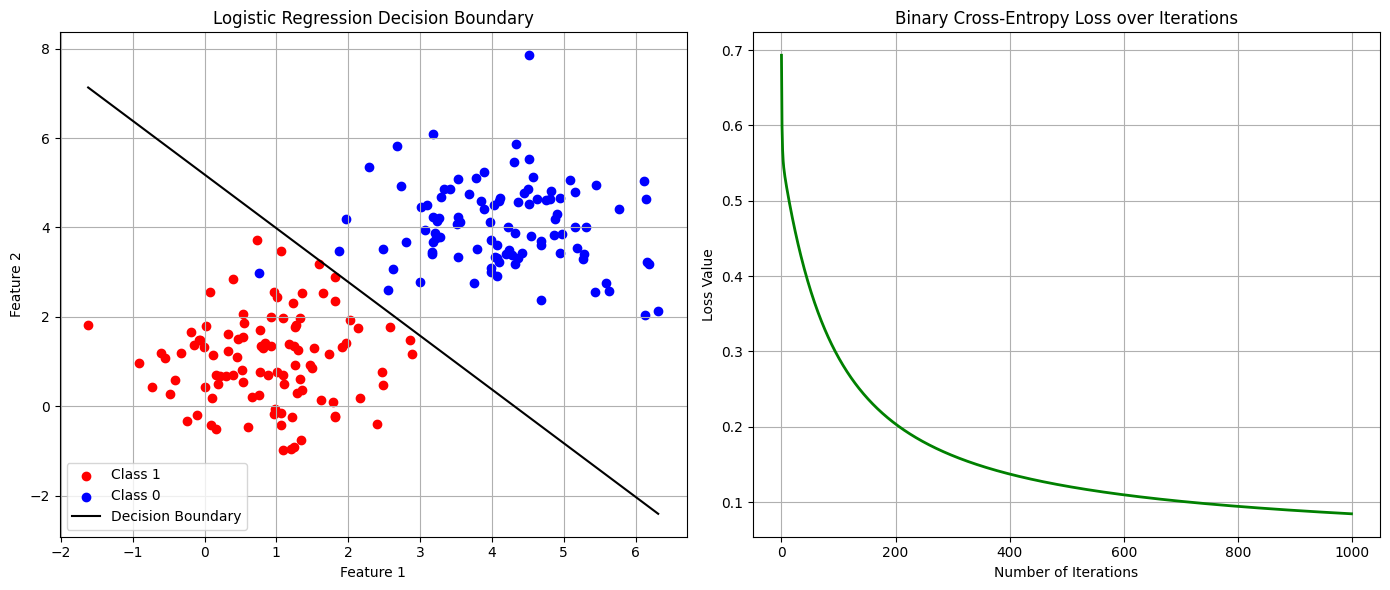

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define the sigmoid activation function ---
def sigmoid(z):
    """
    The sigmoid function, which squashes any real value into the range (0, 1).
    This is used to get a probability for classification.
    """
    return 1 / (1 + np.exp(-z))

# --- Step 2: Define the Gradient Descent solver for Logistic Regression ---
def gradient_descent_logistic_solve(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Calculates the coefficients for a logistic regression model
    using Gradient Descent to minimize the binary cross-entropy loss.

    Args:
        X (np.array): The feature matrix of shape (m, n).
        y (np.array): The target vector of shape (m, 1), with values 0 or 1.
        learning_rate (float): The size of the steps taken to update coefficients.
        n_iterations (int): The number of training iterations.

    Returns:
        tuple: A tuple containing the final coefficients (np.array)
               and a list of loss values per iteration.
    """
    # Get the number of samples (m)
    m = X.shape[0]

    # Add a column of ones for the intercept term (beta_0).
    X_b = np.c_[np.ones((m, 1)), X]

    # Initialize the coefficients (beta) with zeros.
    beta = np.zeros((X_b.shape[1], 1))

    # List to store the loss for each iteration
    loss_history = []

    # Iterate a specified number of times to update the coefficients
    for iteration in range(n_iterations):
        # Calculate the predictions (probabilities) using the sigmoid function
        y_pred = sigmoid(X_b @ beta)

        # Calculate the binary cross-entropy loss
        # Note: A small value (1e-15) is added to avoid log(0)
        loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        loss_history.append(loss)

        # Calculate the gradient of the loss function
        # The derivation of the gradient for binary cross-entropy simplifies to this
        gradients = X_b.T @ (y_pred - y) / m

        # Update the coefficients
        beta = beta - learning_rate * gradients

    return beta, loss_history

# --- Step 3: Generate sample data for binary classification ---
np.random.seed(42)
m = 200
X1 = 1 + np.random.randn(m // 2, 2)
y1 = np.ones((m // 2, 1))

X2 = 4 + np.random.randn(m // 2, 2)
y2 = np.zeros((m // 2, 1))

X_train = np.vstack([X1, X2])
y_train = np.vstack([y1, y2])

# --- Step 4: Solve for the coefficients using Gradient Descent ---
beta, loss_history = gradient_descent_logistic_solve(X_train, y_train, learning_rate=0.1, n_iterations=1000)

# Check if the solution was successful and extract coefficients
if beta is not None:
    print("Calculated Coefficients:")
    print(f"  beta_0 (Intercept): {beta[0][0]:.4f}")
    print(f"  beta_1: {beta[1][0]:.4f}")
    print(f"  beta_2: {beta[2][0]:.4f}")

# --- Step 5: Visualize the results ---
plt.figure(figsize=(14, 6))

# Subplot 1: Data and Decision Boundary
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='blue', label='Class 0')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
# The decision boundary is defined where the linear combination of features is zero.
# beta_0 + beta_1*x1 + beta_2*x2 = 0
# We can rearrange to solve for x2: x2 = (-beta_0 - beta_1*x1) / beta_2
x_boundary = np.array([X_train[:, 0].min(), X_train[:, 0].max()])
y_boundary = (-beta[0] - beta[1] * x_boundary) / beta[2]
plt.plot(x_boundary, y_boundary, 'k-', label='Decision Boundary')
plt.legend()
plt.grid(True)

# Subplot 2: Loss over iterations
plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, color='green', linewidth=2)
plt.title('Binary Cross-Entropy Loss over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss Value')
plt.grid(True)

plt.tight_layout()
plt.show()
